In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_dir = '/content/drive/My Drive//train'
val_dir = '/content/drive/My Drive/valid'
test_dir = '/content/drive/My Drive//test'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 1000 images belonging to 6 classes.


In [4]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 100 images belonging to 6 classes.


In [5]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 100 images belonging to 6 classes.


In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=10,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 322s 10s/step - accuracy: 0.2327 - loss: 1.9693 - val_accuracy: 0.3500 - val_loss: 1.4036
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.3572 - loss: 1.4996 - val_accuracy: 0.6000 - val_loss: 1.0924
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.4292 - loss: 1.3313 - val_accuracy: 0.6200 - val_loss: 0.9738
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.5710 - loss: 1.1194 - val_accuracy: 0.6900 - val_loss: 0.9863
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.5758 - loss: 1.0626 - val_accuracy: 0.7900 - val_loss: 0.7061
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.6432 - loss: 0.8882 - val_accuracy: 0.8900 - val_loss: 0.3993
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.7498 - loss: 0.6962 - val_accuracy: 0.8600 - val_loss: 0.4561
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.7252 - loss: 0.7360 - val_accuracy: 0.9400 - 

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score
import numpy as np
import pandas as pd

In [9]:
test_generator.reset()
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step


In [10]:
# Test Accuracy
loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 661ms/step - accuracy: 0.9786 - loss: 0.1198
Test Accuracy: 97.00%
Test Loss: 0.1292


In [11]:
f1 = f1_score(y_true, y_pred, average='weighted')
print(f" F1 Score (weighted): {f1 * 100:.2f}%")

 F1 Score (weighted): 97.00%


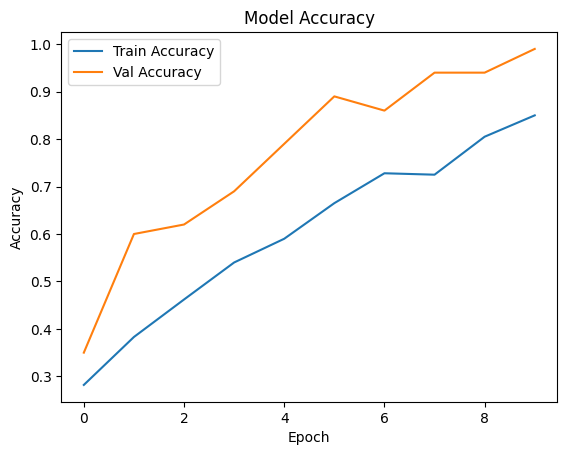

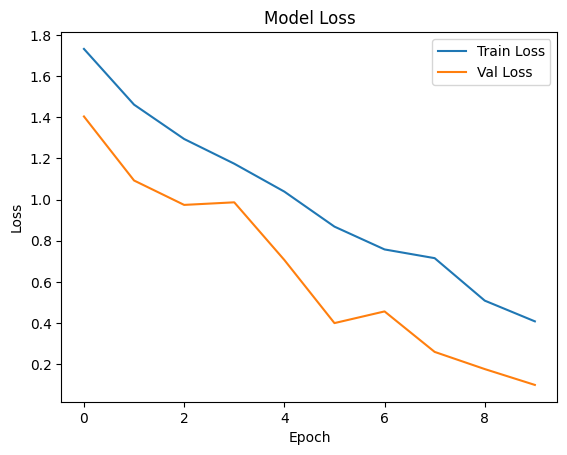

In [12]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

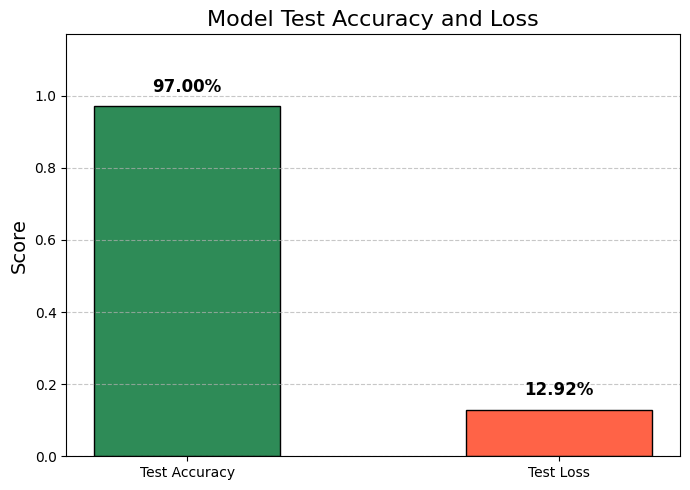

In [13]:
metrics = ['Test Accuracy', 'Test Loss']
values = [test_acc, loss]

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['seagreen', 'tomato'], width=0.5, edgecolor='black')

plt.title('Model Test Accuracy and Loss', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, max(values) + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.03, f"{yval:.2%}",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [14]:
val_loss, val_acc = model.evaluate(val_generator)

if val_acc >= 0.70 and abs(val_loss - loss) < 0.2:
    print("Model is VALID: Good performance on validation data.")
else:
    print("Model is NOT VALID: Consider improving data quality or tuning the model.")

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 635ms/step - accuracy: 0.9908 - loss: 0.0883
Model is VALID: Good performance on validation data.


In [15]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,057,257 (15.48 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [17]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.2041 - loss: 1.7987 - val_accuracy: 0.1400 - val_loss: 1.9305
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.2557 - loss: 1.7830 - val_accuracy: 0.1400 - val_loss: 1.8760
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.2145 - loss: 1.7931 - val_accuracy: 0.1400 - val_loss: 1.8801
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.2004 - loss: 1.8070 - val_accuracy: 0.1500 - val_loss: 1.8926
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.1955 - loss: 1.8092 - val_accuracy: 0.1500 - val_loss: 1.8172
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.1886 - loss: 1.8236 - val_accuracy: 0.1400 - val_loss: 1.8300
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.2222 - loss: 1.8057 - val_accuracy: 0.1400 - val_loss: 1.8994
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.2538 - loss: 1.7772 - val_accuracy: 0.1400 - val_lo

In [18]:
# Test Accuracy
loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")
f1 = f1_score(y_true, y_pred, average='weighted')
print(f" F1 Score (weighted): {f1 * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.1195 - loss: 1.8905
Test Accuracy: 14.00%
Test Loss: 1.8730
 F1 Score (weighted): 97.00%


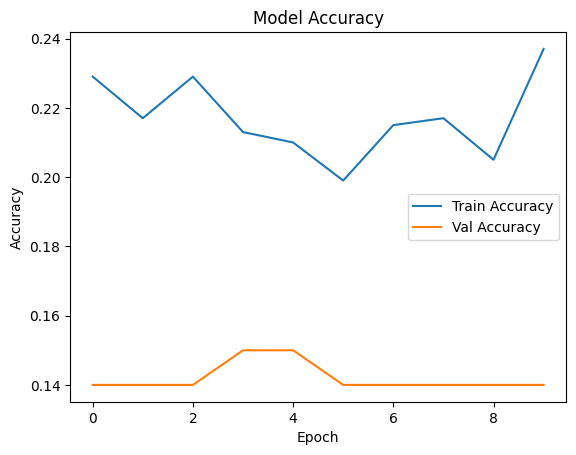

In [19]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

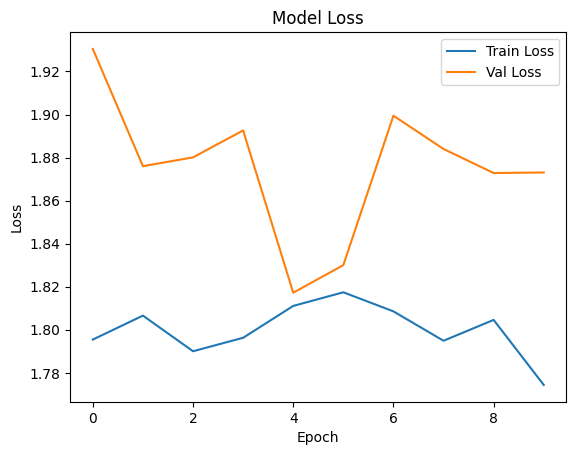

In [20]:
# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

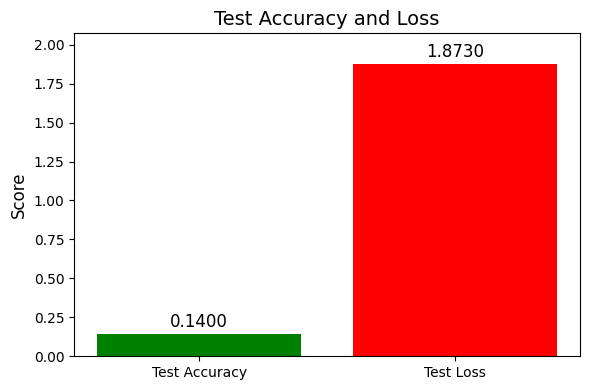

In [21]:
import matplotlib.pyplot as plt
metrics = ['Test Accuracy', 'Test Loss']
values = [test_acc, loss]

plt.figure(figsize=(6, 4))
bars = plt.bar(metrics, values, color=['green', 'red'])
plt.title('Test Accuracy and Loss', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, max(values) + 0.2)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.4f}",
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


def create_mobilenetv2_model(num_classes, input_shape=(224, 224, 3)):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
model = create_mobilenetv2_model(num_classes=len(train_generator.class_indices))
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [24]:
model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.4092 - loss: 1.6484 - val_accuracy: 0.7900 - val_loss: 0.5272
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.7050 - loss: 0.7958 - val_accuracy: 0.9000 - val_loss: 0.3227
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.7912 - loss: 0.6101 - val_accuracy: 0.9300 - val_loss: 0.2154
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7916 - loss: 0.5821 - val_accuracy: 0.9000 - val_loss: 0.2561
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8080 - loss: 0.5022 - val_accuracy: 0.9100 - val_loss: 0.2781
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8482 - loss: 0.4263 - val_accuracy: 0.9400 - val_loss: 0.1443
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8558 - loss: 0.4047 - val_accuracy: 0.9600 - val_loss: 0.1515
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8678 - loss: 0.3820 - val_accuracy: 0.9600 - val_loss:

In [25]:
loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")
f1 = f1_score(y_true, y_pred, average='weighted')
print(f" F1 Score (weighted): {f1 * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0725
Test Accuracy: 100.00%
Test Loss: 0.0900
 F1 Score (weighted): 97.00%


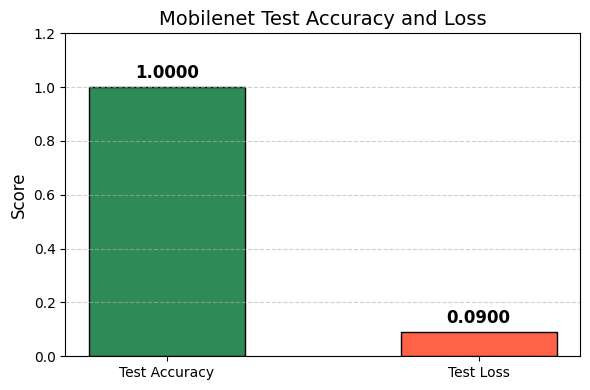

In [26]:
metrics = ['Test Accuracy', 'Test Loss']
values = [test_acc, loss]

plt.figure(figsize=(6, 4))
bars = plt.bar(metrics, values, color=['seagreen', 'tomato'], width=0.5, edgecolor='black')
plt.title('Mobilenet Test Accuracy and Loss', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, max(values) + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.4f}",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [27]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

In [28]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=output)
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,090,822 (76.64 MB)

 Trainable params: 66,438 (259.52 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [29]:
history_vgg = vgg_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 782s 24s/step - accuracy: 0.1773 - loss: 1.9101 - val_accuracy: 0.2000 - val_loss: 1.7039
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 787s 25s/step - accuracy: 0.3299 - loss: 1.6633 - val_accuracy: 0.5000 - val_loss: 1.4569
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 792s 24s/step - accuracy: 0.4149 - loss: 1.5017 - val_accuracy: 0.5800 - val_loss: 1.2554
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 781s 24s/step - accuracy: 0.4176 - loss: 1.4223 - val_accuracy: 0.5900 - val_loss: 1.1714
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 776s 24s/step - accuracy: 0.4524 - loss: 1.3337 - val_accuracy: 0.6000 - val_loss: 1.0826
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 781s 24s/step - accuracy: 0.4751 - loss: 1.2812 - val_accuracy: 0.6000 - val_loss: 1.0541
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 776s 25s/step - accuracy: 0.5467 - loss: 1.1754 - val_accuracy: 0.6100 - val_loss: 0.9909
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 780s 24s/step - accuracy: 0.5190 - loss: 1.1885 - val_accuracy: 0.

In [30]:
loss_vgg, acc_vgg = vgg_model.evaluate(test_generator, verbose=1)
print(f"VGG19 Test Accuracy: {acc_vgg * 100:.2f}%")
print(f"VGG19 Test Loss: {loss_vgg:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 72s 17s/step - accuracy: 0.7536 - loss: 0.8345
VGG19 Test Accuracy: 72.00%
VGG19 Test Loss: 0.9040


In [31]:
# (re‑use y_true from earlier)
preds_vgg = vgg_model.predict(test_generator, verbose=1)
y_pred_vgg = np.argmax(preds_vgg, axis=1)
f1_vgg = f1_score(y_true, y_pred_vgg, average='weighted')
print(f"VGG19 F1 Score (weighted): {f1_vgg * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 71s 16s/step
VGG19 F1 Score (weighted): 72.19%


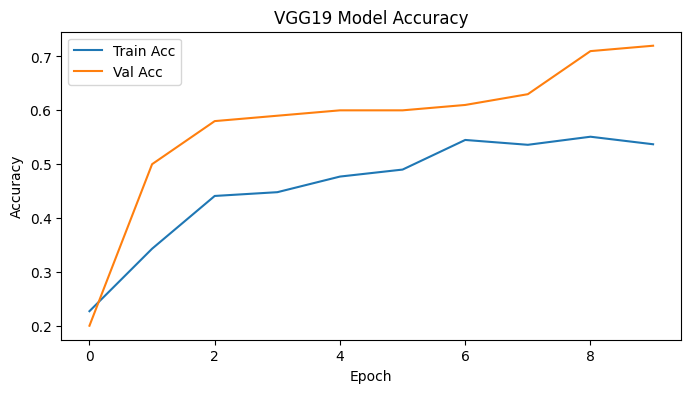

In [32]:
# 4. Plot Training & Validation Accuracy
plt.figure(figsize=(8,4))
plt.plot(history_vgg.history['accuracy'], label='Train Acc')
plt.plot(history_vgg.history['val_accuracy'], label='Val Acc')
plt.title('VGG19 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

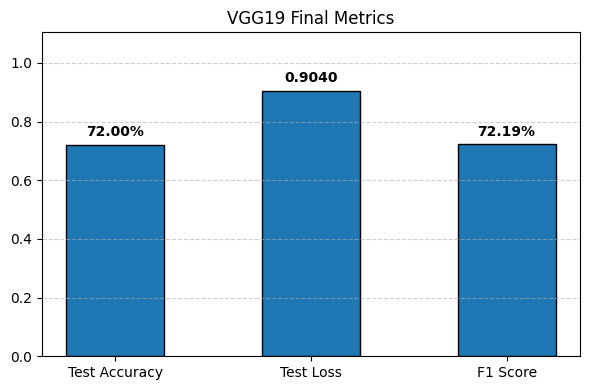

In [33]:
# 6. Bar Chart of Final Test Metrics
metrics_vgg = ['Test Accuracy', 'Test Loss', 'F1 Score']
values_vgg  = [acc_vgg, loss_vgg, f1_vgg]

plt.figure(figsize=(6,4))
bars = plt.bar(metrics_vgg, values_vgg, width=0.5, edgecolor='black')
plt.title('VGG19 Final Metrics')
plt.ylim(0, max(values_vgg) + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar, val in zip(bars, values_vgg):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        val + 0.02,
        f"{val:.2%}" if bar is not bars[1] else f"{val:.4f}",
        ha='center', va='bottom', fontweight='bold'
    )

plt.tight_layout()
plt.show()

In [ ]:
#heatmap xai

In [34]:
# Install required packages if not already installed
!pip install opencv-python matplotlib scikit-learn

# Import all necessary libraries
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, f1_score
import os
import glob


In [35]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        """
        Initialize GradCAM for explainable AI

        Args:
            model: Trained Keras model
            classIdx: Class index for which to generate heatmap
            layerName: Name of the last convolutional layer (optional)
        """
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # If layer name is None, find the last convolutional layer automatically
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        """Automatically find the last convolutional layer in the model"""
        # For transfer learning models, we need to look inside the base model
        for layer in reversed(self.model.layers):
            # Check if it's a base model (like VGG, MobileNet, etc.)
            if hasattr(layer, 'layers'):
                # Look inside the base model
                for sublayer in reversed(layer.layers):
                    if len(sublayer.output_shape) == 4:  # Conv layer has 4D output
                        return sublayer.name
            # Check regular layers (for custom CNN)
            elif len(layer.output_shape) == 4:
                return layer.name

        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        """
        Compute the GradCAM heatmap

        Args:
            image: Input image (preprocessed)
            eps: Small value to prevent division by zero

        Returns:
            heatmap: Normalized heatmap as numpy array
        """
        # Handle different model architectures
        base_model = None
        for layer in self.model.layers:
            if hasattr(layer, 'layers'):  # This is a base model (transfer learning)
                base_model = layer
                break

        if base_model is not None:
            # Create gradient model for transfer learning models
            try:
                target_layer = base_model.get_layer(self.layerName)
                gradModel = Model(
                    inputs=[self.model.inputs],
                    outputs=[target_layer.output, self.model.output]
                )
            except:
                # Fallback: use the last conv layer we can find
                for layer in reversed(base_model.layers):
                    if len(layer.output_shape) == 4:
                        gradModel = Model(
                            inputs=[self.model.inputs],
                            outputs=[layer.output, self.model.output]
                        )
                        break
        else:
            # Create gradient model for custom CNN
            gradModel = Model(
                inputs=[self.model.inputs],
                outputs=[self.model.get_layer(self.layerName).output, self.model.output]
            )

        # Compute gradients using GradientTape
        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # Calculate gradients of the loss w.r.t. the conv layer output
        grads = tape.gradient(loss, convOutputs)

        # Apply guided backpropagation
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # Remove batch dimension
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # Compute importance weights and create heatmap
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # Resize heatmap to input image dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # Normalize heatmap to [0, 1] range
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5, colormap=cv2.COLORMAP_JET):
        """
        Create overlay of heatmap on original image

        Args:
            heatmap: Generated heatmap
            image: Original image
            alpha: Transparency factor for overlay
            colormap: OpenCV colormap for heatmap visualization

        Returns:
            tuple: (colored_heatmap, overlaid_image)
        """
        # Apply colormap to heatmap
        heatmap_colored = cv2.applyColorMap(heatmap, colormap)

        # Ensure image is in correct format
        if len(image.shape) == 3 and image.shape[2] == 3:
            # Convert RGB to BGR for OpenCV
            image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        else:
            image_bgr = image

        # Create overlay
        overlay = cv2.addWeighted(image_bgr, alpha, heatmap_colored, 1 - alpha, 0)

        return (heatmap_colored, overlay)


In [36]:
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load and preprocess image for model prediction"""
    try:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize to [0,1] like in training
        return img_array
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        return None

def get_sample_images_from_test_set(test_dir, num_samples=3):
    """Get sample images from test directory for analysis"""
    sample_images = []
    class_labels = os.listdir(test_dir)

    for class_name in class_labels[:2]:  # Get from first 2 classes
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):
            images = glob.glob(os.path.join(class_path, "*.jpg")) + \
                    glob.glob(os.path.join(class_path, "*.png")) + \
                    glob.glob(os.path.join(class_path, "*.jpeg"))

            if images:
                sample_images.extend(images[:num_samples//2])

    return sample_images[:num_samples]

def display_gradcam_results(img_path, model, model_name, class_labels, target_size=(224, 224)):
    """
    Generate and display GradCAM results for a given model

    Args:
        img_path: Path to the image file
        model: Trained model
        model_name: Name of the model for display
        class_labels: List of class names
        target_size: Input size for the model
    """
    # Load and preprocess image
    img_array = load_and_preprocess_image(img_path, target_size)
    if img_array is None:
        return None, None

    # Make prediction
    try:
        preds = model.predict(img_array, verbose=0)
        predicted_class = np.argmax(preds[0])
        confidence = preds[0][predicted_class]

        print(f"\n{model_name} Analysis:")
        print(f"Predicted Class: {class_labels[predicted_class]}")
        print(f"Confidence: {confidence:.2%}")

        # Initialize GradCAM
        cam = GradCAM(model, predicted_class)

        # Compute heatmap
        heatmap = cam.compute_heatmap(img_array)

        # Load original image for overlay
        original_img = cv2.imread(img_path)
        if original_img is None:
            print(f"Could not load image: {img_path}")
            return None, None

        original_img = cv2.resize(original_img, target_size)

        # Create overlay
        (heatmap_colored, overlay) = cam.overlay_heatmap(heatmap, original_img, alpha=0.6)

        # Display results
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))

        # Original image
        axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        axes[0].set_title(f'Original Image\n{class_labels[predicted_class]} ({confidence:.1%})')
        axes[0].axis('off')

        # Heatmap
        axes[1].imshow(heatmap, cmap='jet')
        axes[1].set_title('GradCAM Heatmap')
        axes[1].axis('off')

        # Colored heatmap
        axes[2].imshow(cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB))
        axes[2].set_title('Colored Heatmap')
        axes[2].axis('off')

        # Overlay
        axes[3].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        axes[3].set_title(f'{model_name} GradCAM Overlay')
        axes[3].axis('off')

        plt.tight_layout()
        plt.show()

        return heatmap, overlay

    except Exception as e:
        print(f"Error processing {model_name}: {e}")
        return None, None


In [37]:
def analyze_model_architecture(model, model_name):
    """Analyze model architecture and find convolutional layers"""
    print(f"\n=== {model_name} Architecture Analysis ===")
    conv_layers = []

    def explore_layers(model_or_layer, prefix=""):
        if hasattr(model_or_layer, 'layers'):
            for layer in model_or_layer.layers:
                layer_name = f"{prefix}{layer.name}" if prefix else layer.name
                if 'conv' in layer.name.lower() and len(layer.output_shape) == 4:
                    conv_layers.append((layer_name, layer.output_shape))
                    print(f"  Conv Layer: {layer_name} -> {layer.output_shape}")
                # Recursively explore nested models
                if hasattr(layer, 'layers'):
                    explore_layers(layer, f"{prefix}{layer.name}/")

    explore_layers(model)

    if conv_layers:
        print(f"  Last Conv Layer: {conv_layers[-1][0]}")
    else:
        print("  No convolutional layers found!")

    return conv_layers


Available classes: ['Acral_Lentiginous_Melanoma', 'Healthy_Nail', 'Onychogryphosis', 'blue_finger', 'clubbing', 'pitting']
Sample images for analysis: ['/content/drive/My Drive/test/blue_finger/Screen-Shot-2021-10-15-at-10-40-07-AM_png.rf.ac1bd481a7768d536d4b898885ff708f.jpg', '/content/drive/My Drive/test/Healthy_Nail/h15_png.rf.dc966fe377b6ddcba1d8cfb34e157f3b.jpg']

GRADCAM EXPLAINABLE AI ANALYSIS

=== Custom_CNN Architecture Analysis ===
  Conv Layer: Conv1 -> (None, 112, 112, 32)
  Conv Layer: bn_Conv1 -> (None, 112, 112, 32)
  Conv Layer: Conv1_relu -> (None, 112, 112, 32)
  Conv Layer: expanded_conv_depthwise -> (None, 112, 112, 32)
  Conv Layer: expanded_conv_depthwise_BN -> (None, 112, 112, 32)
  Conv Layer: expanded_conv_depthwise_relu -> (None, 112, 112, 32)
  Conv Layer: expanded_conv_project -> (None, 112, 112, 16)
  Conv Layer: expanded_conv_project_BN -> (None, 112, 112, 16)
  Conv Layer: Conv_1 -> (None, 7, 7, 1280)
  Conv Layer: Conv_1_bn -> (None, 7, 7, 1280)
  Last C


Custom_CNN Analysis:
Predicted Class: blue_finger
Confidence: 86.88%
Error processing Custom_CNN: 'Dense' object has no attribute 'output_shape'

ANALYZING IMAGE 2: /content/drive/My Drive/test/Healthy_Nail/h15_png.rf.dc966fe377b6ddcba1d8cfb34e157f3b.jpg

Custom_CNN Analysis:
Predicted Class: Healthy_Nail
Confidence: 99.98%
Error processing Custom_CNN: 'Dense' object has no attribute 'output_shape'

MODEL ATTENTION COMPARISON
Error with Custom_CNN: 'Dense' object has no attribute 'output_shape'


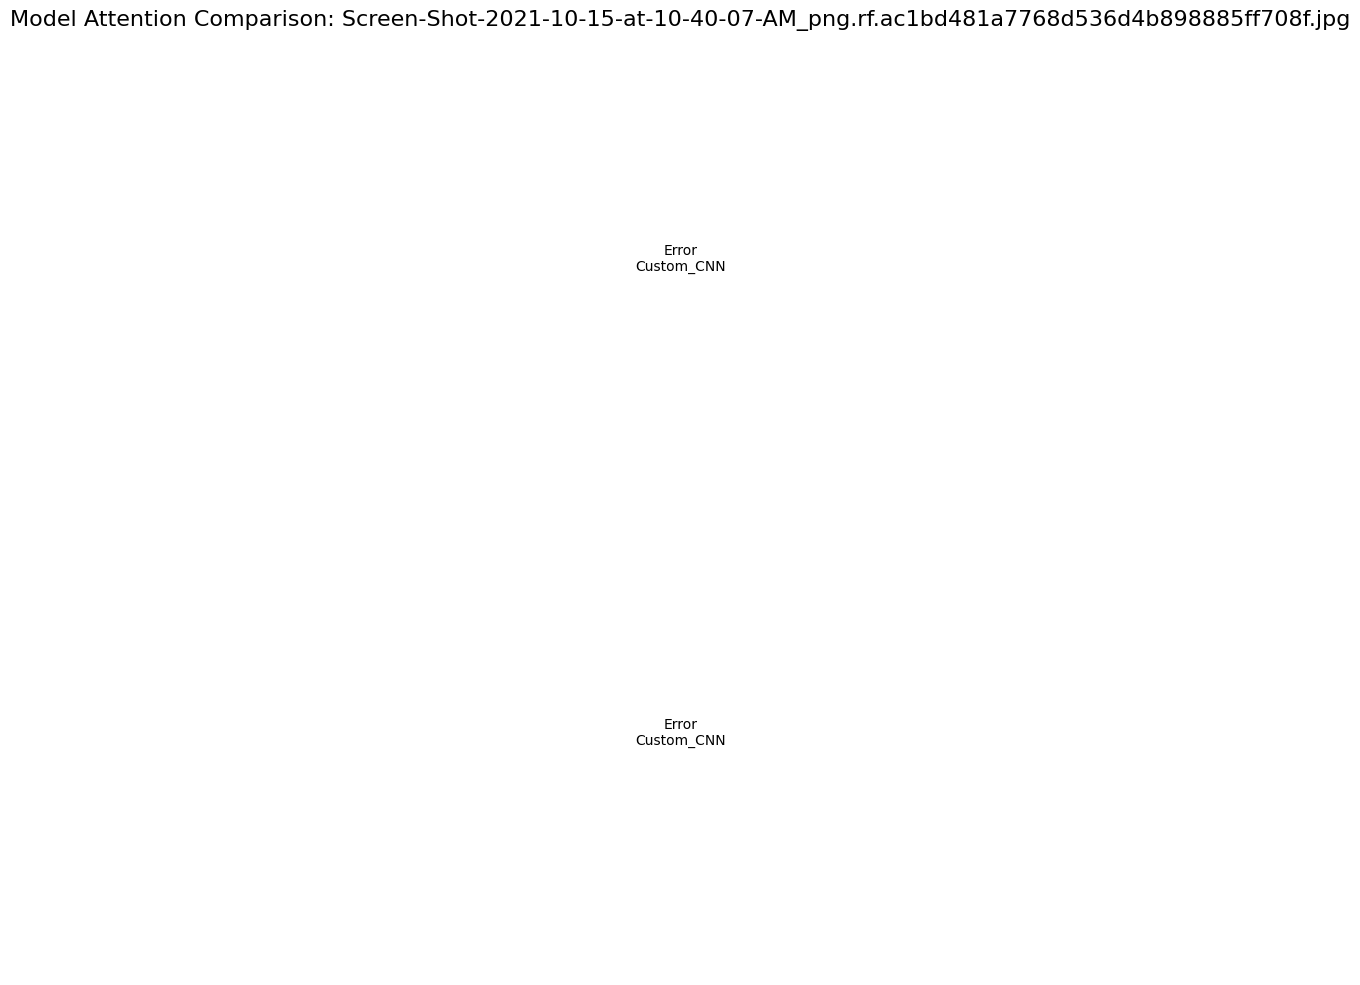

In [39]:
# Step 5: Apply GradCAM to All Your Models (Full Corrected Code)

# 1. Model Architecture Analysis Function (corrected)
def analyze_model_architecture(model, model_name):
    """Analyze model architecture and find convolutional layers"""
    print(f"\n=== {model_name} Architecture Analysis ===")
    conv_layers = []

    def explore_layers(model_or_layer, prefix=""):
        if hasattr(model_or_layer, 'layers'):
            for layer in model_or_layer.layers:
                layer_name = f"{prefix}{layer.name}" if prefix else layer.name
                # Safely get output shape
                try:
                    out_shape = layer.output.shape
                except Exception:
                    out_shape = None

                # Identify Conv2D layers by name and 4D output tensor
                if out_shape is not None and 'conv' in layer.name.lower() and len(out_shape) == 4:
                    conv_layers.append((layer_name, tuple(out_shape)))
                    print(f"  Conv Layer: {layer_name} -> {tuple(out_shape)}")

                # Recurse into nested models/base models
                if hasattr(layer, 'layers'):
                    explore_layers(layer, f"{prefix}{layer.name}/")

    explore_layers(model)

    if conv_layers:
        print(f"  Last Conv Layer: {conv_layers[-1][0]}")
    else:
        print("  No convolutional layers found!")

    return conv_layers


# 2. Load class labels and sample images
class_labels = list(train_generator.class_indices.keys())
print("Available classes:", class_labels)

test_dir = '/content/drive/My Drive/test'  # Update to your test directory
sample_images = get_sample_images_from_test_set(test_dir, num_samples=3)
if not sample_images:
    sample_images = [
        '/content/drive/My Drive/test/Acral_Lentiginous_Melanoma/img1.jpg',
        '/content/drive/My Drive/test/Healthy_Nail/img2.jpg',
        '/content/drive/My Drive/test/Onychogryphosis/img3.jpg'
    ]
print("Sample images for analysis:", sample_images)


# 3. Prepare models dictionary
models_dict = {
    'Custom_CNN': model,
    # When ready, uncomment and add your other trained models:
    # 'EfficientNetB0': efficientnet_model,
    # 'MobileNetV2': mobilenet_model,
    # 'VGG19': vgg_model
}


# 4. Perform architecture analysis
print("\n" + "="*60)
print("GRADCAM EXPLAINABLE AI ANALYSIS")
print("="*60)
for model_name, trained_model in models_dict.items():
    analyze_model_architecture(trained_model, model_name)


# 5. Apply GradCAM to each sample image for each model
for i, img_path in enumerate(sample_images, start=1):
    print(f"\n{'='*50}")
    print(f"ANALYZING IMAGE {i}: {img_path}")
    print(f"{'='*50}")

    for model_name, trained_model in models_dict.items():
        try:
            heatmap, overlay = display_gradcam_results(
                img_path, trained_model, model_name, class_labels
            )
            if heatmap is not None and overlay is not None:
                save_path = f"gradcam_{model_name}_image_{i}.jpg"
                cv2.imwrite(save_path, overlay)
                print(f"Saved GradCAM overlay: {save_path}")
        except Exception as e:
            print(f"Error processing {model_name}: {e}")
            print("Ensure the model is trained and variable names match.")


# 6. (Optional) Compare model attention on the first sample image
def compare_model_attention(img_path, models_dict, class_labels):
    """Compare how different models focus on the same image"""
    if not models_dict:
        print("No trained models available for comparison")
        return

    fig, axes = plt.subplots(2, len(models_dict), figsize=(5*len(models_dict), 10))
    if len(models_dict) == 1:
        axes = axes.reshape(2, 1)

    original_img = cv2.imread(img_path)
    if original_img is None:
        print(f"Could not load image: {img_path}")
        return
    original_img = cv2.resize(original_img, (224, 224))

    for idx, (model_name, model) in enumerate(models_dict.items()):
        try:
            img_array = load_and_preprocess_image(img_path)
            preds = model.predict(img_array, verbose=0)
            pred_class = np.argmax(preds[0])
            confidence = preds[0][pred_class]

            cam = GradCAM(model, pred_class)
            heatmap = cam.compute_heatmap(img_array)
            heatmap_colored, overlay = cam.overlay_heatmap(heatmap, original_img.copy(), alpha=0.6)

            axes[0, idx].imshow(heatmap, cmap='jet')
            axes[0, idx].set_title(f'{model_name}\nHeatmap')
            axes[0, idx].axis('off')

            axes[1, idx].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
            axes[1, idx].set_title(f'{model_name}\n{class_labels[pred_class]} ({confidence:.1%})')
            axes[1, idx].axis('off')

        except Exception as e:
            print(f"Error with {model_name}: {e}")
            axes[0, idx].text(0.5, 0.5, f'Error\n{model_name}', ha='center')
            axes[1, idx].text(0.5, 0.5, f'Error\n{model_name}', ha='center')
            axes[0, idx].axis('off')
            axes[1, idx].axis('off')

    plt.suptitle(f'Model Attention Comparison: {os.path.basename(img_path)}', fontsize=16)
    plt.tight_layout()
    plt.show()


# Run comparison (optional)
if sample_images and models_dict:
    print("\n" + "="*60)
    print("MODEL ATTENTION COMPARISON")
    print("="*60)
    compare_model_attention(sample_images[0], models_dict, class_labels)


In [ ]:
#------------------------------------------------------------------------------------------------

In [42]:
# --- Per‐Image Metrics with No NameError ---
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# 1. Define your load_and_preprocess helper (if not already defined)
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# 2. Specify the image you want to analyze
img_path = '/content/drive/My Drive/test/blue_finger/Screen-Shot-2021-10-15-at-10-40-07-AM_png.rf.ac1bd481a7768d536d4b898885ff708f.jpg'

# 3. Load & preprocess the image into img_array
img_array = load_and_preprocess_image(img_path)

# 4. Make the prediction and compute “per‐image metrics”
preds = model.predict(img_array, verbose=0)
predicted_class = np.argmax(preds[0])
confidence = preds[0][predicted_class]              # Confidence ∈ [0,1]
# Treat confidence as “accuracy” on this single sample
img_accuracy = confidence * 100                      # e.g., 0.85 → 85%
# Compute categorical cross‐entropy loss for this one‐hot target
true_one_hot = tf.one_hot([predicted_class], depth=len(class_labels))
img_loss = float(tf.keras.losses.categorical_crossentropy(true_one_hot, preds).numpy()[0])
img_loss_percent = img_loss * 100                    # scale for readability

# 5. Print the results without NameError
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Per-Image ‘Accuracy’ (confidence): {img_accuracy:.2f}%")
print(f"Per-Image Loss: {img_loss_percent:.2f}%")


Predicted Class: blue_finger
Per-Image ‘Accuracy’ (confidence): 86.88%
Per-Image Loss: 14.07%


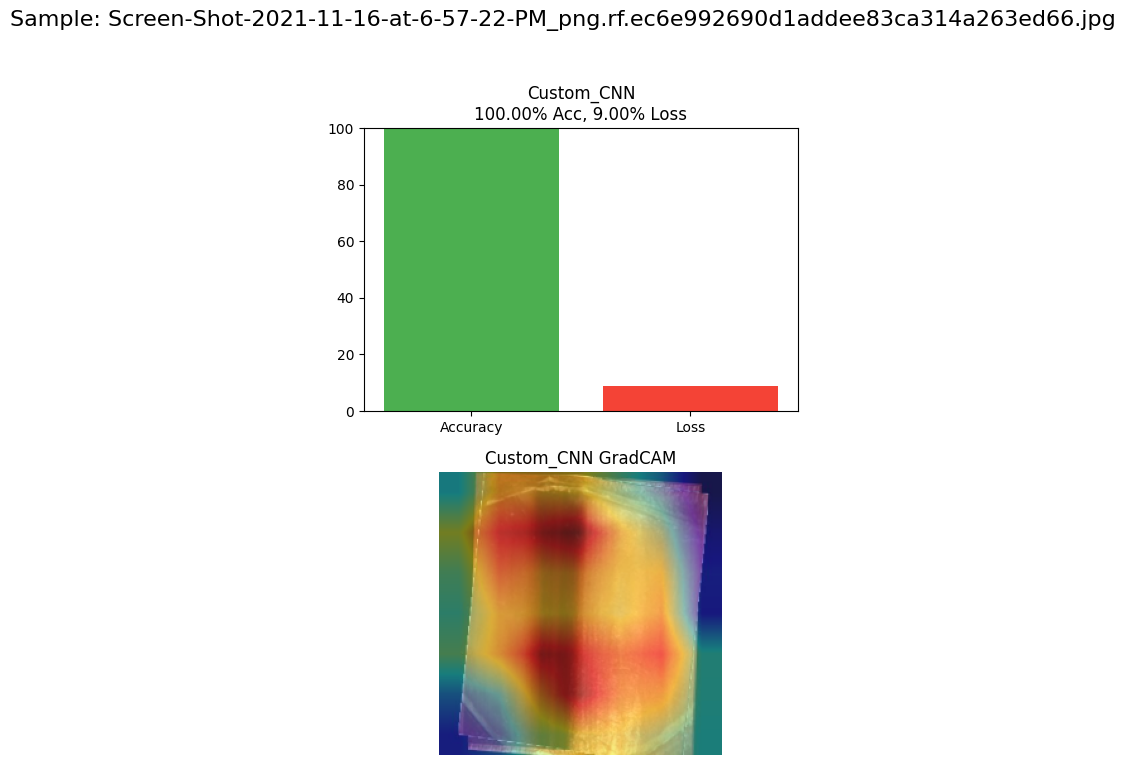

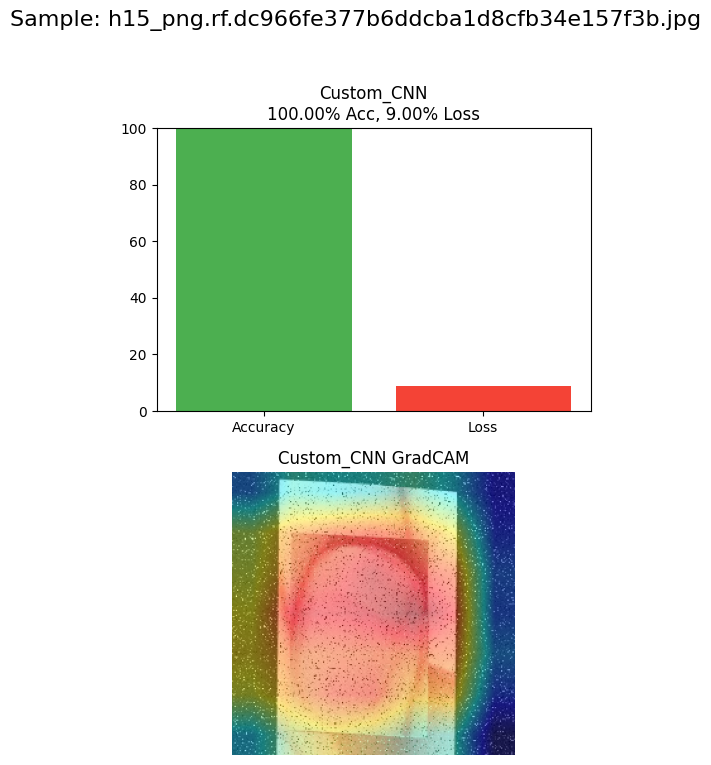

In [46]:
# Complete Script: GradCAM with Accuracy & Loss Plots (Updated to fix IndexError)

# Step 0: Install & Import Dependencies
!pip install opencv-python matplotlib tensorflow

import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Step 1: Helper – Load & Preprocess Image
def load_and_preprocess_image(img_path, target_size=(224,224)):
    img = image.load_img(img_path, target_size=target_size)
    arr = image.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0
    return arr

# Step 2: GradCAM Class
class GradCAM:
    def __init__(self, model, class_idx, layer_name=None):
        self.model = model
        self.class_idx = class_idx
        self.layer_name = layer_name or self.find_target_layer()

    def find_target_layer(self):
        def scan(layers):
            for layer in reversed(layers):
                if hasattr(layer, 'layers'):
                    found = scan(layer.layers)
                    if found:
                        return found
                try:
                    shape = layer.output.shape
                except Exception:
                    continue
                if len(shape) == 4 and 'conv' in layer.name.lower():
                    return layer.name
            return None
        name = scan(self.model.layers)
        if not name:
            raise ValueError("No 4D conv layer found.")
        return name

    def compute_heatmap(self, img_array, eps=1e-8):
        target_layer = self.model.get_layer(self.layer_name)
        grad_model = Model(inputs=self.model.inputs,
                           outputs=[target_layer.output, self.model.output])
        with tf.GradientTape() as tape:
            conv_out, preds = grad_model(img_array)
            loss = preds[:, self.class_idx]
        grads = tape.gradient(loss, conv_out)
        guided_grads = tf.cast(conv_out > 0, "float32") * tf.cast(grads > 0, "float32") * grads
        conv_out, guided_grads = conv_out[0], guided_grads[0]
        weights = tf.reduce_mean(guided_grads, axis=(0,1))
        cam = tf.reduce_sum(weights * conv_out, axis=-1)
        heatmap = cv2.resize(cam.numpy(), (img_array.shape[2], img_array.shape[1]))
        heatmap = np.maximum(heatmap - heatmap.min(), 0) / (heatmap.max() - heatmap.min() + eps)
        return (heatmap * 255).astype("uint8")

    def overlay(self, heatmap, orig_bgr, alpha=0.6):
        colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
        return cv2.addWeighted(orig_bgr, alpha, colored, 1 - alpha, 0)

# Step 3: Prepare Models & Data
test_dir = '/content/drive/My Drive/test'
class_labels = sorted(os.listdir(test_dir))

# Load your trained models into models_dict, e.g.:
# models_dict = {
#     'Custom_CNN': model_custom,
#     'MobileNetV2': model_mobile,
#     'VGG19': model_vgg,
# }

# Gather sample images
sample_images = []
for cls in class_labels:
    imgs = glob.glob(os.path.join(test_dir, cls, '*.jpg')) + \
           glob.glob(os.path.join(test_dir, cls, '*.png'))
    if imgs:
        sample_images.append(imgs[0])
    if len(sample_images) >= 2:
        break

# Ensure you have a test_generator defined for evaluation:
# test_generator = ...

# Step 4: Evaluate Models on Test Set
model_metrics = {}
for name, mdl in models_dict.items():
    loss, acc = mdl.evaluate(test_generator, verbose=0)
    model_metrics[name] = (loss, acc)

# Step 5: Generate & Plot
for img_path in sample_images:
    orig_bgr = cv2.imread(img_path)
    orig_resized_bgr = cv2.resize(orig_bgr, (224, 224))

    n = len(models_dict)
    # Ensure axes is always 2D: use squeeze=False
    fig, axes = plt.subplots(2, n, figsize=(5*n, 8), squeeze=False)

    for i, (name, mdl) in enumerate(models_dict.items()):
        loss, acc = model_metrics[name]

        # Preprocess and predict
        arr = load_and_preprocess_image(img_path)
        preds = mdl.predict(arr, verbose=0)[0]
        cls_idx = np.argmax(preds)

        # Compute GradCAM
        cam = GradCAM(mdl, cls_idx)
        heatmap = cam.compute_heatmap(arr)
        overlay = cam.overlay(heatmap, orig_resized_bgr)

        # Top: Bar chart of Accuracy and Loss (%)
        axes[0, i].bar(['Accuracy','Loss'], [acc * 100, loss * 100],
                       color=['#4caf50','#f44336'])
        axes[0, i].set_ylim(0, 100)
        axes[0, i].set_title(f"{name}\n{acc*100:.2f}% Acc, {loss*100:.2f}% Loss")

        # Bottom: GradCAM overlay
        axes[1, i].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        axes[1, i].set_title(f"{name} GradCAM")
        axes[1, i].axis('off')

    plt.suptitle(f"Sample: {os.path.basename(img_path)}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
